In [16]:
from audio import *
from OFDM import *
%matplotlib inline

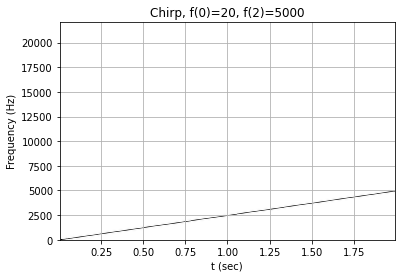

In [17]:
fs = 44100
T = 2
f0 = 20
f1 = 5000

t = np.linspace(0, T, T*fs)
fsweep = chirp(t, f0=f0, f1=f1, t1=T, method='linear')
fsweep_reverse = fsweep[::-1]

ff, tt, Sxx = spectrogram(fsweep, fs=fs, noverlap=256, nperseg=512,nfft=2048)
plt.pcolormesh(tt, ff, Sxx, cmap='gray_r')
plt.title('Chirp, f(0)={}, f({})={}'.format(f0,T,f1))
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.show()

In [29]:
pilot = 1 + 1j
pilot_ = 1 - 1j
ofdm_length = 1024
known_signal = np.full(ofdm_length/2,pilot)
known_signal_ = 
print(known_signal)
np.fft.ifft(known_signal)

[ 1.+1.j  1.+1.j  1.+1.j ...,  1.+1.j  1.+1.j  1.+1.j]


array([ 1.+1.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j])

In [21]:
scipy.io.wavfile.write(r"sound_files/chirp.wav", fs, fsweep)

signal = play_record(fsweep, fs=fs, padding_before = 1,padding_after=1)

Recording...
Finished recording


In [24]:
sync_signal = np.convolve(signal ,fsweep_reverse,mode='same')

99068


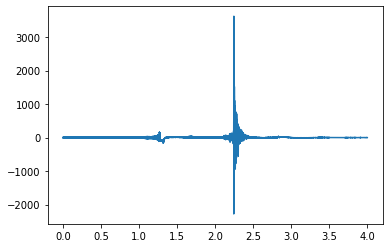

In [25]:
time = np.linspace(0, len(sync_signal) /fs, len(sync_signal))
plt.plot(time,output)

index_max = np.where(sync_signal == np.amax(sync_signal))[0][0]
print(index_max)